### Introduction to the project
#### Information on Kaggle
link of data set = https://www.kaggle.com/datasets/kabhishm/best-selling-nintendo-switch-video-games
#### Exploratory Data Analysis On Best Selling Nintendo Switch Video Games
#### List of best-selling Nintendo Switch video games over a specific period of time.

### Introduction 
Welcome to the project that focuses on performing Exploratory Data Analysis On Best Selling Nintendo Switch Video Games on a games dataset.This project provides an in-depth understanding of the data, uncovering patterns, and exploring relationships between variables.

### Contents and Main Idea 
This project aims to provide a comprehensive analysis of the games dataset and uncover insights into the popularity and success of different types of games, their genres, developers, publishers and their release date. The dataset consists of various variables such as game name, genre, platform, year of release, and others. The main idea of this project is to understand the trends and patterns in the gaming industry and to uncover the factors that contribute to the success of a game.

### Learning Objectives
This project offers several learning objectives for those interested in exploring data analysis and visualization. The following are some of the key learning objectives of this project:

* Develop a comprehensive understanding of the games dataset
* Practice data cleaning and preprocessing techniques
* Explore patterns and relationships between variables using data visualization techniques
* Uncover insights into the popularity and success of different types of games,  and platforms
* Learn to interpret the results of EDA and draw conclusions based on the data

In [38]:
### import required libriaries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for the plots
colors = ["salmon", "lightblue"]

### Reading The Data(CSV)

This is a list of video games for the Nintendo Switch video game console that have sold or shipped at least one million copies. As Nintendo shares the sales of their video games every quarter while most other publishers do not share sales figures per console, this list consists mostly of Nintendo-published titles.

In [2]:
### Reading the file in csv format
df_games = pd.read_csv('best_selling_switch_games.csv')

### Getting an overview of the data
#### Some basic information about our data include:
* First & last 5 rows of our dataset
* Some description
* Some numerical information

In [3]:
df_games.head()

,title,copies_sold,genre,developer,publisher,as_of,release_date
0,Mario Kart 8 Deluxe,48410000.0,Kart racing,Nintendo EPD,Nintendo,2022-09-30,2017-04-28
1,Animal Crossing: New Horizons,40170000.0,Social simulation,Nintendo EPD,Nintendo,2022-09-30,2020-03-20
2,Super Smash Bros. Ultimate,29530000.0,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2022-09-30,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000.0,Action-adventure,Nintendo EPD,Nintendo,2022-09-30,2017-03-03
4,Pokémon Sword and Shield,25370000.0,Role-playing,Game Freak,The Pokémon CompanyNintendo,2022-09-30,2019-11-15


In [4]:
df_games.tail()

,title,copies_sold,genre,developer,publisher,as_of,release_date
68,Fitness Boxing,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2020-09-08,2018-12-20
69,Fitness Boxing 2: Rhythm and Exercise,1000000.0,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2021-12-09,2020-12-04
70,Shin Megami Tensei V,1000000.0,Role-playing,Atlus,JP: AtlusNA: SegaPAL: Nintendo,2022-04-18,2021-11-11
71,Story of Seasons: Pioneers of Olive Town,1000000.0,Simulationrole-playing,Marvelous,Xseed Games,2021-11-18,2021-02-25
72,Thief Simulator,1000000.0,Stealth,Noble Muffins,Forever Entertainment,2021-07-16,2019-05-19


In [5]:
#Shape of the dataset(rows and columns)
df_games.shape

(73, 7)

Means that there are 73 rows and 7 columns 

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df_games.describe()

,copies_sold
count,73.000
mean,6788904.110
std,9179178.213
min,1000000.000
25%,1580000.000
50%,3010000.000
75%,7900000.000
max,48410000.000


Copies sold is the only numerical column
This shows us the number of copies that was sold over that period of time

In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         73 non-null     object 
 1   copies_sold   73 non-null     float64
 2   genre         73 non-null     object 
 3   developer     73 non-null     object 
 4   publisher     73 non-null     object 
 5   as_of         73 non-null     object 
 6   release_date  73 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.1+ KB


### This shows us the following:

* No Null/Missing values
* Only one numerical column, else are objects.
* Memory usage is about 4.1 KB 

#### The copies sold column should be changed to an integer for better analysis

In [9]:
df_games['copies_sold'] = df_games['copies_sold'].astype(int)

I would want to convert the release date column to the appropriate datatype(date time) and drop the as_of column because I
won't be needing it for my analysis

In [10]:
df_games['release_date'] = pd.to_datetime(df_games['release_date'])
df_games = df_games.drop(['as_of'], axis=1)

In [11]:
df_games.head()

,title,copies_sold,genre,developer,publisher,release_date
0,Mario Kart 8 Deluxe,48410000,Kart racing,Nintendo EPD,Nintendo,2017-04-28
1,Animal Crossing: New Horizons,40170000,Social simulation,Nintendo EPD,Nintendo,2020-03-20
2,Super Smash Bros. Ultimate,29530000,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2018-12-07
3,The Legend of Zelda: Breath of the Wild,27790000,Action-adventure,Nintendo EPD,Nintendo,2017-03-03
4,Pokémon Sword and Shield,25370000,Role-playing,Game Freak,The Pokémon CompanyNintendo,2019-11-15


### Column Exploration
* Some value counts of the columns
* Basic inferenced made without any relations whatsoever


#### Most common month for release of games
To do this, I would first create an additional release month column to extract the month from the release month column 

In [12]:
df_games['Month_Released'] = df_games['release_date'].dt.month 

In [13]:
df_games

,title,copies_sold,genre,developer,publisher,release_date,Month_Released
0,Mario Kart 8 Deluxe,48410000,Kart racing,Nintendo EPD,Nintendo,2017-04-28,4
1,Animal Crossing: New Horizons,40170000,Social simulation,Nintendo EPD,Nintendo,2020-03-20,3
2,Super Smash Bros. Ultimate,29530000,Fighting,Bandai Namco StudiosSora Ltd.,Nintendo,2018-12-07,12
3,The Legend of Zelda: Breath of the Wild,27790000,Action-adventure,Nintendo EPD,Nintendo,2017-03-03,3
4,Pokémon Sword and Shield,25370000,Role-playing,Game Freak,The Pokémon CompanyNintendo,2019-11-15,11
...,...,...,...,...,...,...,...
68,Fitness Boxing,1000000,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2018-12-20,12
69,Fitness Boxing 2: Rhythm and Exercise,1000000,Exergamerhythm,Imagineer,JP: ImagineerNA/PAL: Nintendo,2020-12-04,12
70,Shin Megami Tensei V,1000000,Role-playing,Atlus,JP: AtlusNA: SegaPAL: Nintendo,2021-11-11,11
71,Story of Seasons: Pioneers of Olive Town,1000000,Simulationrole-playing,Marvelous,Xseed Games,2021-02-25,2


### 1. Month with the highest copies sold after release

In [14]:
df_games.head(1)

,title,copies_sold,genre,developer,publisher,release_date,Month_Released
0,Mario Kart 8 Deluxe,48410000,Kart racing,Nintendo EPD,Nintendo,2017-04-28,4


range(1, 13)


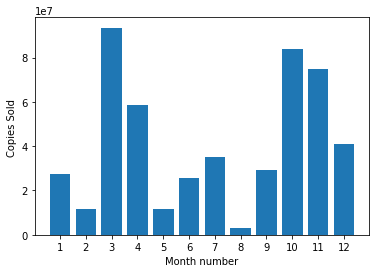

In [17]:
months = range(1,13)
print(months)

plt.bar(months,df_games.groupby(['Month_Released']).sum()['copies_sold'])
plt.xticks(months)
plt.ylabel('Copies Sold ')
plt.xlabel('Month number')
plt.show()

The Bar above shows that the month of march has the highest number of copies sold.

### 2. Top 10 days for the releasing of games

To this I will also have to extract the day to another column

In [23]:
df_games['Day_Released'] = df_games['release_date'].dt.day 

In [24]:
df_games

,title,copies_sold,genre,developer,publisher,release_date,Month_Released,Day,Day_Released
0,Xenoblade Chronicles 2,2440000,Action role-playing,Monolith Soft,Nintendo,2017-12-01,12,1,1
1,1-2-Switch,3630000,Party,Nintendo EPD,Nintendo,2017-03-03,3,3,3
2,The Legend of Zelda: Breath of the Wild,27790000,Action-adventure,Nintendo EPD,Nintendo,2017-03-03,3,3,3
3,Big Brain Academy: Brain vs. Brain,1590000,Puzzle,Nintendo EPD,Nintendo,2021-12-03,12,3,3
4,Donkey Kong Country: Tropical Freeze,4120000,Platformer,Retro Studios,Nintendo,2018-05-04,5,4,4
...,...,...,...,...,...,...,...,...,...
68,Yoshi's Crafted World,3010000,Platformer,Good-Feel,Nintendo,2019-03-29,3,29,29
69,Pikmin 3 Deluxe,2230000,Real-time strategypuzzle,Nintendo EPDEighting,Nintendo,2020-10-30,10,30,30
70,New Pokémon Snap,2740000,Photography,Bandai Namco Studios,JP: The Pokémon CompanyNA/PAL: Nintendo,2021-04-30,4,30,30
71,Astral Chain,1280000,"Action-adventure, Hack and Slash",PlatinumGames,Nintendo,2019-08-30,8,30,30


In [21]:
df_games.sort_values(by="Day_Released", inplace=True)
df_games.reset_index(inplace=True)
df_games.drop("index", axis=1, inplace=True)

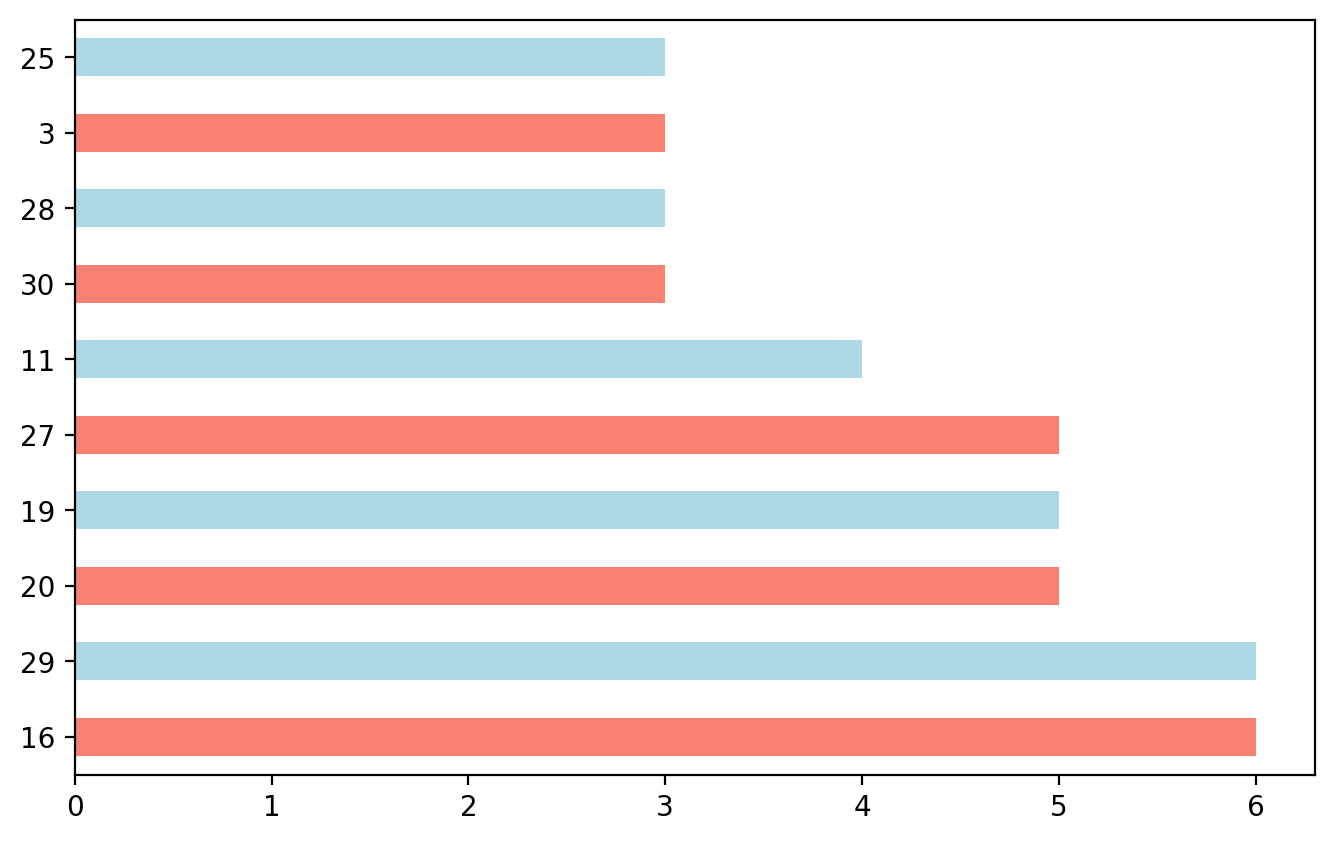

In [27]:
plt.figure(figsize=(8, 5), dpi=200)
df_games["Day_Released"].value_counts(ascending=False).nlargest(10).plot(kind="barh", color=colors);

These are the top ten days with the most relaese.
This shows that most games were released on the 16th and the 29th of the months

### 3.What are the common Genre(s) of the games released?

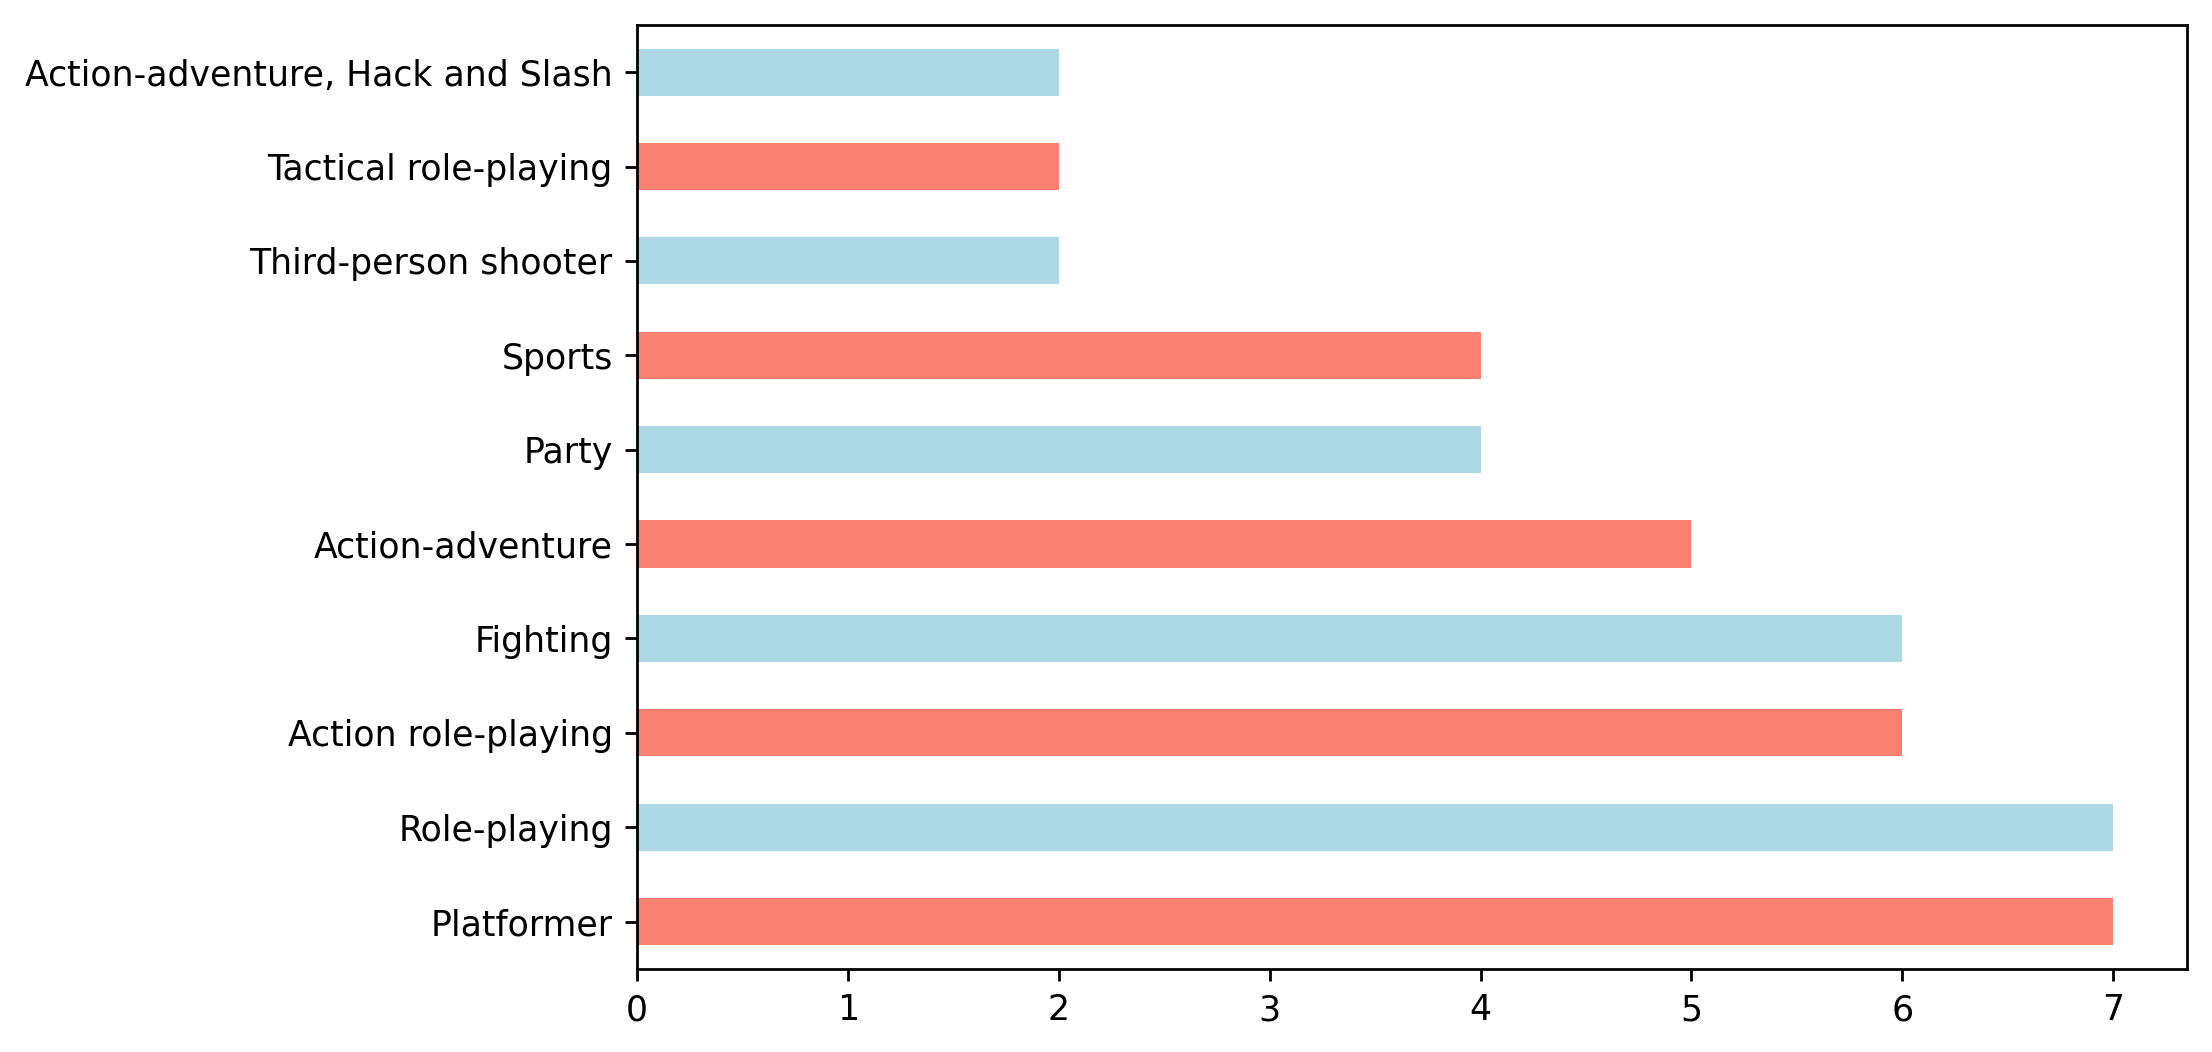

In [33]:
plt.figure(figsize=(8, 5), dpi=250)
df_games["genre"].value_counts().nlargest(10).plot(kind="barh", color=colors);

The most common Genere(s) for the games seem to be Platformer and Role-playing followed by the action role playing and fighting.
* Platformer : A platform game (often simplified as platformer and sometimes called a jump 'n' run game) is a sub-genre of action video games in which the core objective is to move the player character between points in an environment.
* Role Playing : This is an electronic game genre in which players advance through a story quest, and often many side quests, for which their character or party of characters gain experience that improves various attributes and abilities.
* Action role playing: An action role-playing game (often abbreviated action RPG or ARPG) is a subgenre of video games that combines core elements from both the action game and role-playing genre.
* Fighting : A fighting game, also known as a versus fighting game, is a genre of video game that involves combat between two or more players.

### 4 Who are the TOP 10 devlopers of these games?

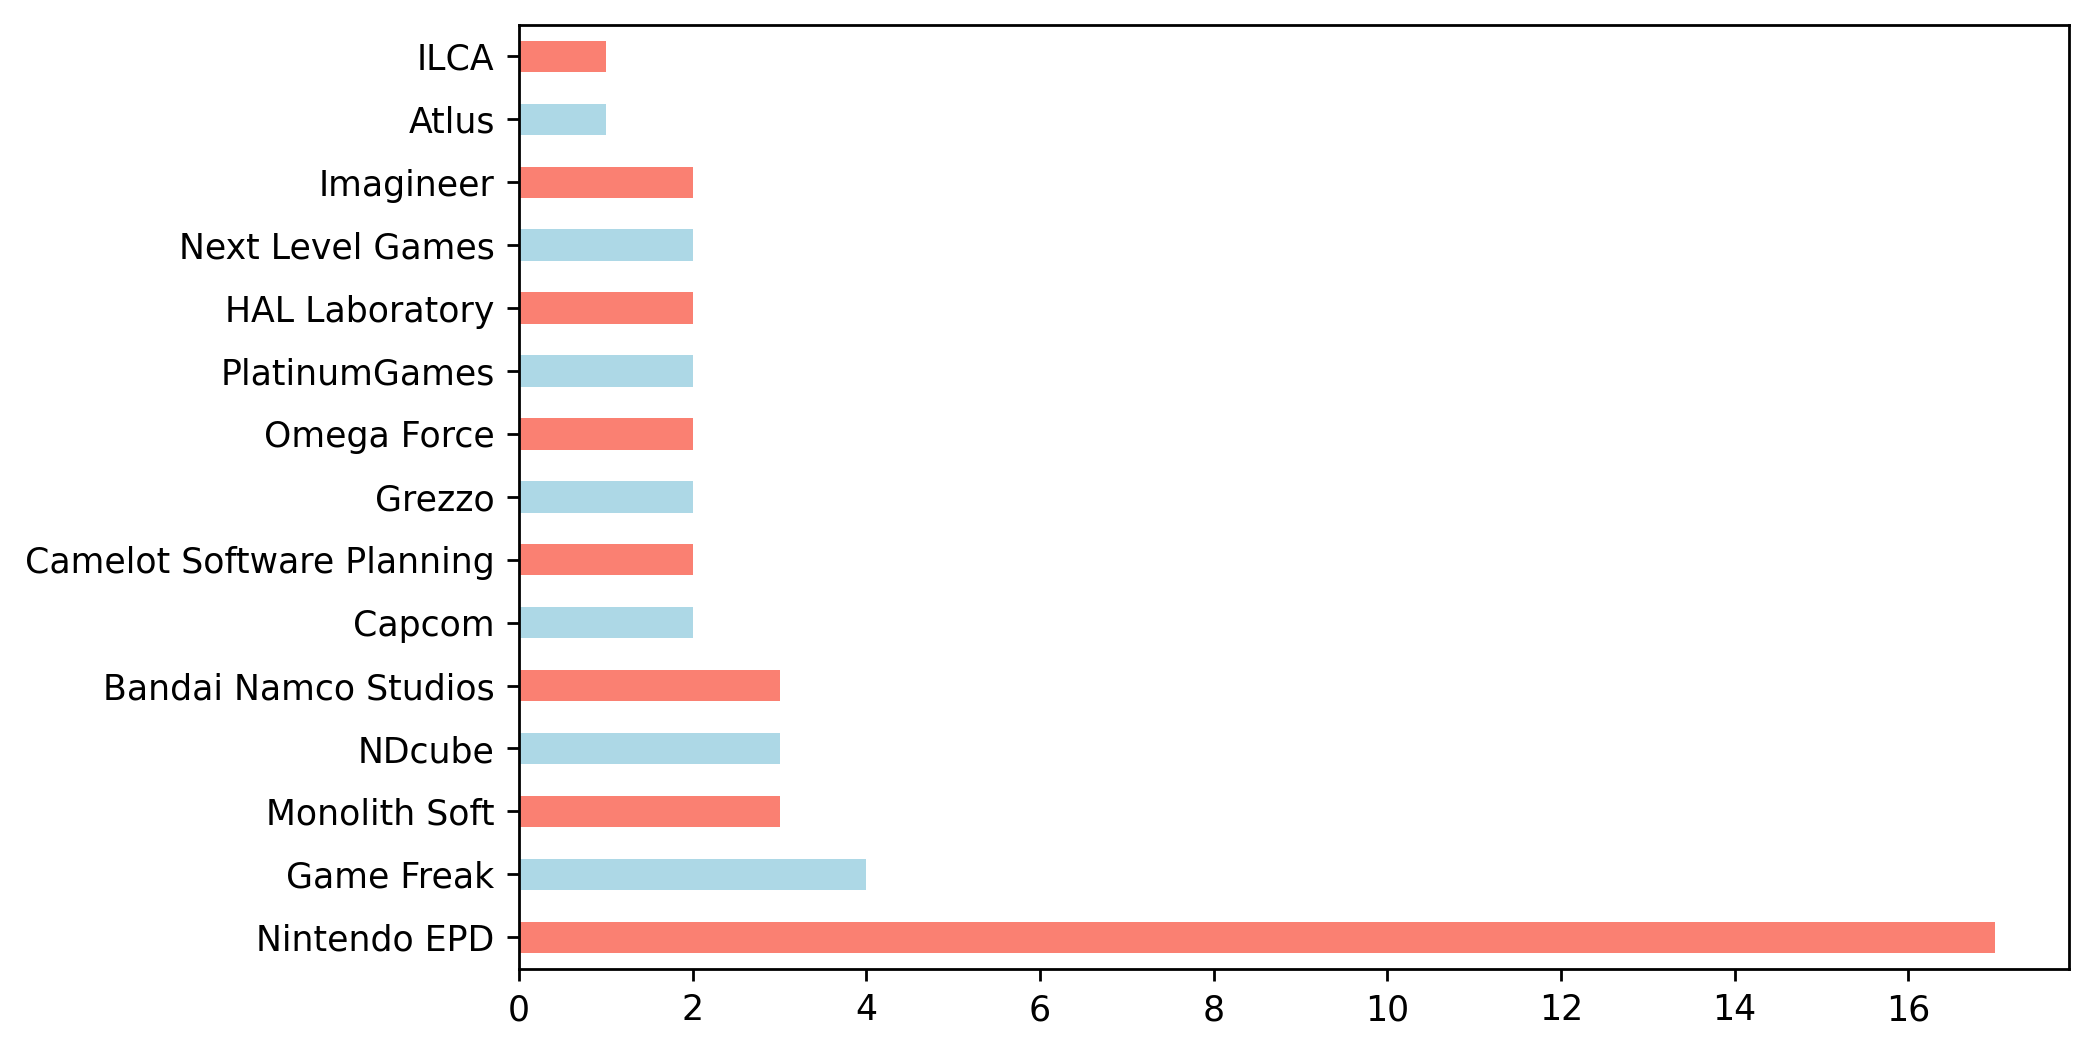

In [36]:
plt.figure(figsize=(8, 5), dpi=250)
df_games["developer"].value_counts().nlargest(15).plot(kind="barh", color=colors);


Nintendo EPD, Followed by Game freak.
* Nintendo EPD: Nintendo Entertainment Planning & Development Division, commonly abbreviated as Nintendo EPD, is the largest division within the Japanese video game company Nintendo. The division focuses on developing and producing video games, mobile apps, and other related entertainment software for the company.

* Game freak: Game Freak Co., Ltd. is a Japanese video game developer, best known as the primary developer of the mainline Pokémon series of role-playing video games published by Nintendo and The Pokémon Company. Game Freak Co., Ltd.

### 5. Most popular Publishers of the games released 

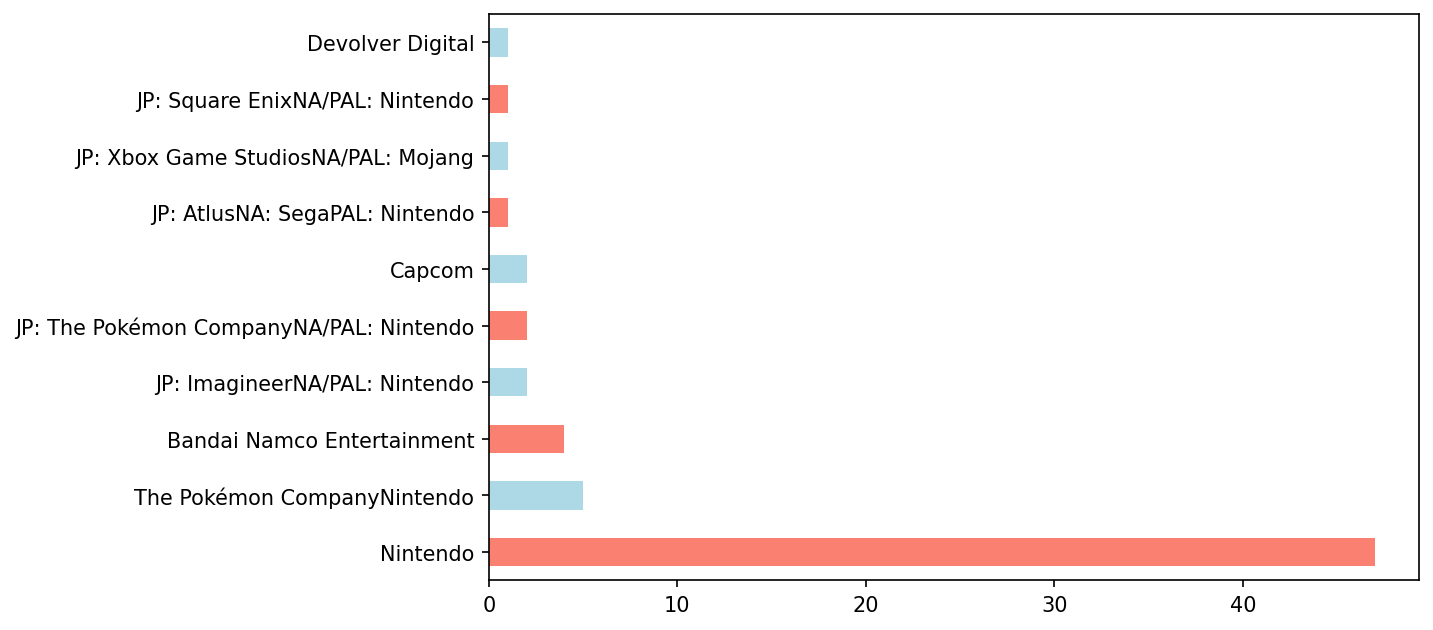

In [37]:
plt.figure(figsize=(8, 5), dpi=150)
df_games["publisher"].value_counts().nlargest(10).plot(kind="barh", color=colors);

Nitendo is the obviously the most popular publisher followed by the pokemon company nintendo then the Bandai Namco Entertainment.
* The pokimon company: Pokémon (an abbreviation for Pocket Monsters in Japan) is a Japanese media franchise managed by The Pokémon Company, founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1996, and is centered around fictional creatures called "Pokémon".
* Bandi Namco Entertainment: BANDAI NAMCO Entertainment Inc. is a Japanese video game developer and publisher. They are known for creating and publishing a wide variety of games across multiple platforms, including consoles, mobile devices, and PC. Some of their most popular franchises include Pac-Man, Tekken, Soulcalibur, and Ace Combat. They also have a strong presence in the mobile gaming market with titles like Dragon Ball Z Dokkan Battle and One Piece Treasure Cruise. BANDAI NAMCO Entertainment also publishes games from other developers and partners with companies such as Nintendo, Microsoft, and Sony to bring their games to a wider audience. They are one of the LARGEST video game publishers in Japan and have offices around the world.
